In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv("50_Startups.csv")
df.head()

,R_D_spent,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R_D_spent        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing_Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [6]:
df.shape

(50, 5)

There is no missing value here, all 50 are non-null

In [7]:
df.describe()

,R_D_spent,Administration,Marketing_Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


 Outlier Treatment:

{'whiskers': [<matplotlib.lines.Line2D at 0x1e1833d44a0>,
 'caps': [<matplotlib.lines.Line2D at 0x1e1833d6720>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e1833d6150>],
 'medians': [<matplotlib.lines.Line2D at 0x1e1833d5ca0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e1833d5bb0>],
 'means': []}

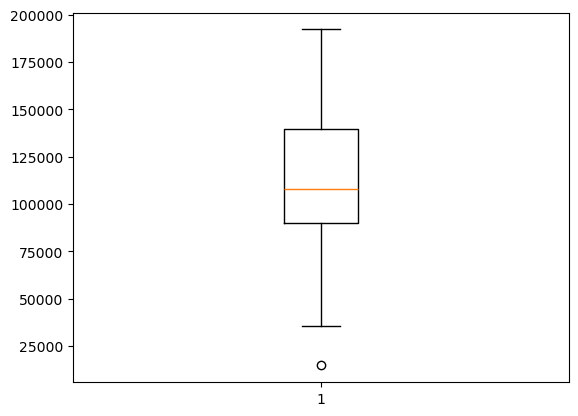

In [17]:
import matplotlib.pyplot as plt
#plt.boxplot(df["R_D_spent"])
#plt.boxplot(df["Administration"])
#plt.boxplot(df["Marketing_Spend"])
plt.boxplot(df["Profit"])

In [23]:
from scipy.stats import zscore

df["R_D_spent_z"] = zscore(df["R_D_spent"], nan_policy="omit")
outliers = df[abs(df["R_D_spent_z"]) > 3]
df["Administration_z"] = zscore(df["Administration"], nan_policy="omit")
outliers = df[abs(df["Administration_z"]) > 3]
df["Marketing_Spend_z"] = zscore(df["Marketing_Spend"], nan_policy="omit")
outliers = df[abs(df["Marketing_Spend_z"]) > 3]
df["Profit_z"] = zscore(df["Profit"], nan_policy="omit")
outliers = df[abs(df["Profit_z"]) > 3]

outliers

,R_D_spent,Administration,Marketing_Spend,State,Profit,R_D_spent_z,Administration_z,Marketing_Spend_z,Profit_z


In [26]:
dfclean=df[["R_D_spent","Administration","Marketing_Spend","State","Profit"]]

In [28]:
dfclean.describe()

,R_D_spent,Administration,Marketing_Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


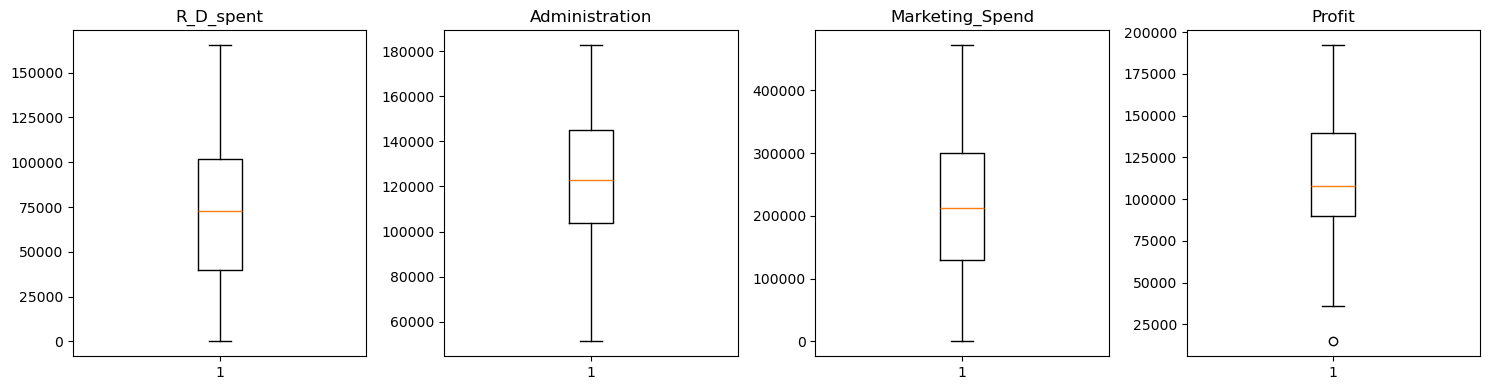

In [30]:
num_cols = ["R_D_spent","Administration","Marketing_Spend","Profit"]

fig, axes = plt.subplots(1, len(num_cols), figsize=(15, 4))

for ax, col in zip(axes, num_cols):
    ax.boxplot(df[col].dropna())
    ax.set_title(col)

plt.tight_layout()
plt.show()


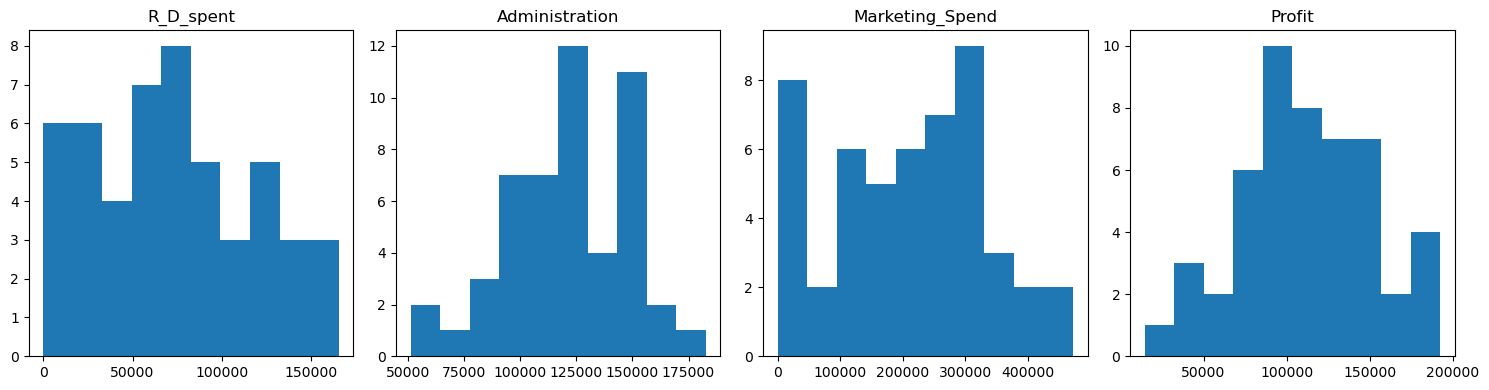

In [31]:
num_cols = ["R_D_spent","Administration","Marketing_Spend","Profit"]

fig, axes = plt.subplots(1, len(num_cols), figsize=(15, 4))

for ax, col in zip(axes, num_cols):
    ax.hist(df[col])
    ax.set_title(col)

plt.tight_layout()
plt.show()

In [32]:
df["State"].value_counts()

State
New York      17
California    17
Florida       16
Name: count, dtype: int64

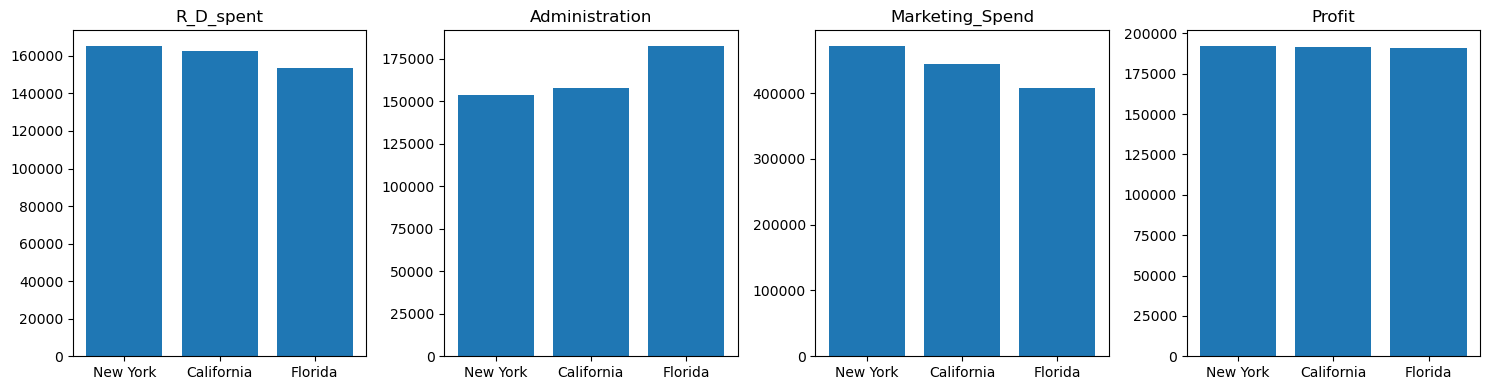

In [33]:
num_cols = ["R_D_spent","Administration","Marketing_Spend","Profit"]

fig, axes = plt.subplots(1, len(num_cols), figsize=(15, 4))

for ax, col in zip(axes, num_cols):
    ax.bar(df["State"],df[col])
    ax.set_title(col)

plt.tight_layout()
plt.show()

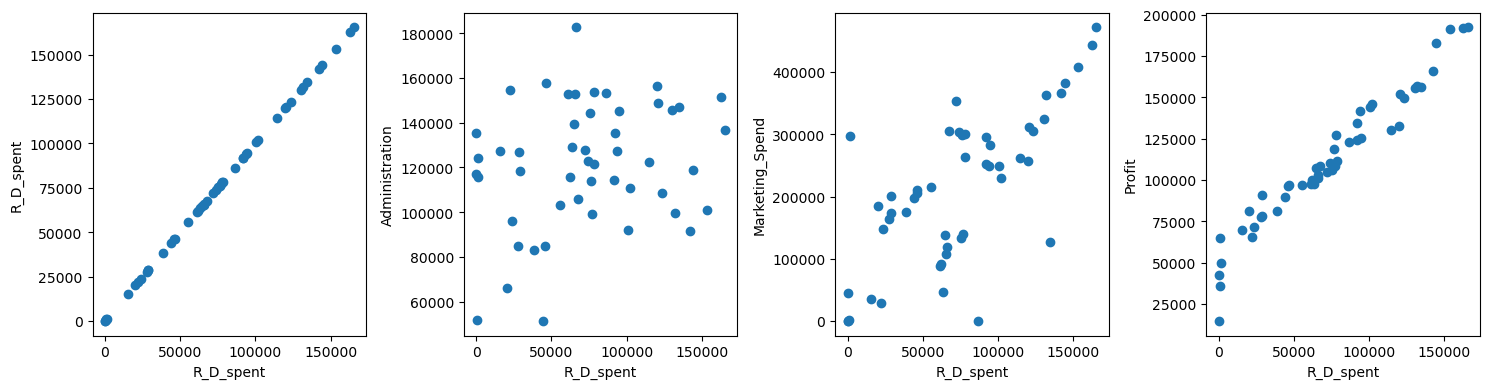

In [36]:
num_cols = ["R_D_spent","Administration","Marketing_Spend","Profit"]

fig, axes = plt.subplots(1, len(num_cols), figsize=(15, 4))

for ax, col in zip(axes, num_cols):
    ax.scatter(df["R_D_spent"],df[col])
    ax.set_xlabel("R_D_spent")
    ax.set_ylabel(col)

plt.tight_layout()
plt.show()

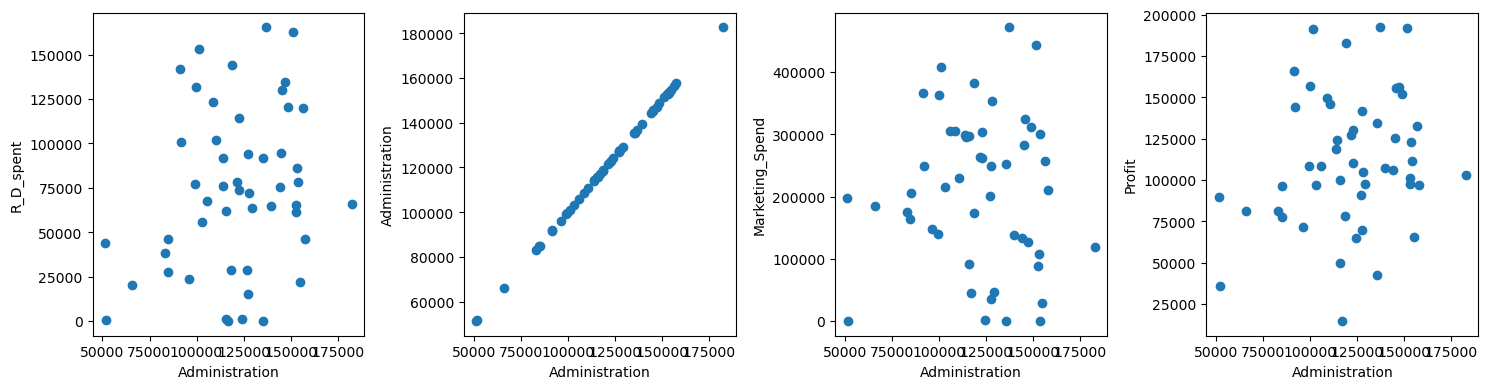

In [37]:
num_cols = ["R_D_spent","Administration","Marketing_Spend","Profit"]

fig, axes = plt.subplots(1, len(num_cols), figsize=(15, 4))

for ax, col in zip(axes, num_cols):
    ax.scatter(df["Administration"],df[col])
    ax.set_xlabel("Administration")
    ax.set_ylabel(col)

plt.tight_layout()
plt.show()

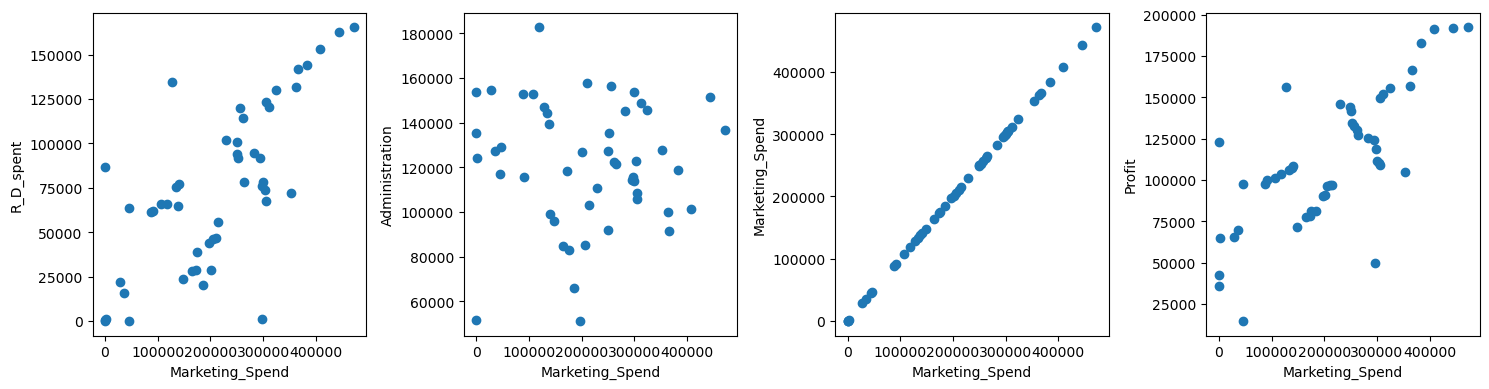

In [38]:
num_cols = ["R_D_spent","Administration","Marketing_Spend","Profit"]

fig, axes = plt.subplots(1, len(num_cols), figsize=(15, 4))

for ax, col in zip(axes, num_cols):
    ax.scatter(df["Marketing_Spend"],df[col])
    ax.set_xlabel("Marketing_Spend")
    ax.set_ylabel(col)

plt.tight_layout()
plt.show()

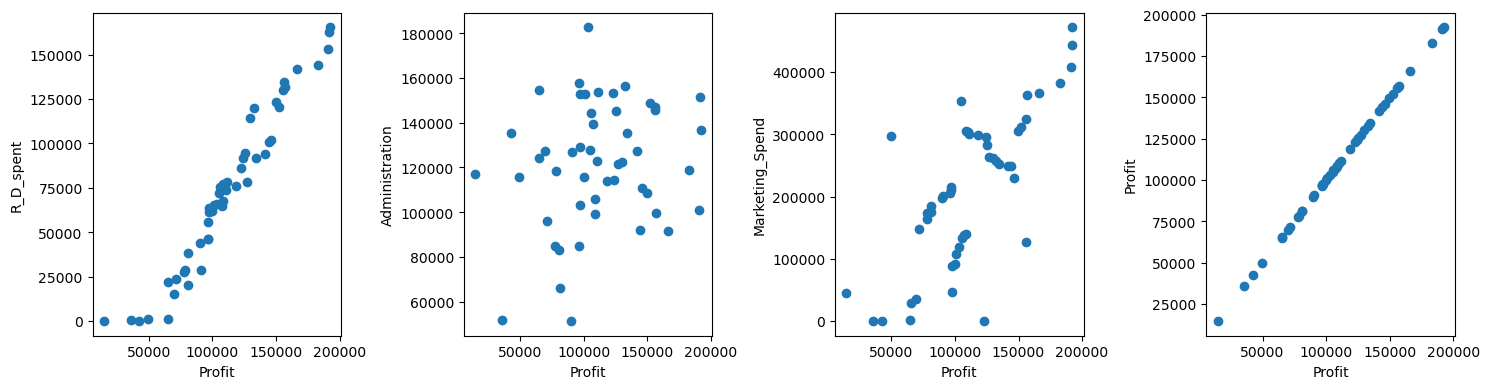

In [39]:
num_cols = ["R_D_spent","Administration","Marketing_Spend","Profit"]

fig, axes = plt.subplots(1, len(num_cols), figsize=(15, 4))

for ax, col in zip(axes, num_cols):
    ax.scatter(df["Profit"],df[col])
    ax.set_xlabel("Profit")
    ax.set_ylabel(col)

plt.tight_layout()
plt.show()

In [41]:
num_cols = ["R_D_spent","Administration","Marketing_Spend","Profit"]
cor_df=df[num_cols].corr()
print(cor_df)

                 R_D_spent  Administration  Marketing_Spend    Profit
R_D_spent         1.000000        0.241955         0.724248  0.972900
Administration    0.241955        1.000000        -0.032154  0.200717
Marketing_Spend   0.724248       -0.032154         1.000000  0.747766
Profit            0.972900        0.200717         0.747766  1.000000


In [42]:
import seaborn as sns

<Axes: >

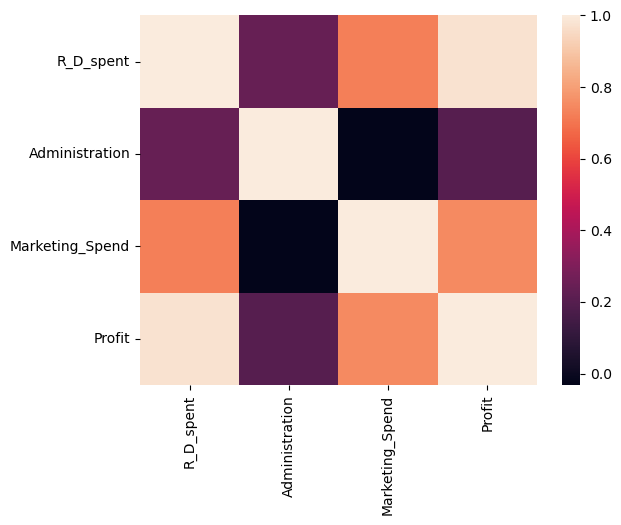

In [45]:
sns.heatmap(cor_df)

In [50]:
from sklearn.preprocessing import LabelEncoder
LabelEncoder=LabelEncoder()
df["State"]=LabelEncoder.fit_transform(df["State"])
df.head()

,R_D_spent,Administration,Marketing_Spend,State,Profit,R_D_spent_z,Administration_z,Marketing_Spend_z,Profit_z
0,165349.20,136897.80,471784.10,2,192261.83,2.016411,0.560753,2.153943,2.011203
1,162597.70,151377.59,443898.53,0,191792.06,1.955860,1.082807,1.923600,1.999430
2,153441.51,101145.55,407934.54,1,191050.39,1.754364,-0.728257,1.626528,1.980842
3,144372.41,118671.85,383199.62,2,182901.99,1.554784,-0.096365,1.422210,1.776627
4,142107.34,91391.77,366168.42,1,166187.94,1.504937,-1.079919,1.281528,1.357740


In [53]:
from sklearn.preprocessing import StandardScaler
StandardScaler=StandardScaler()
df[num_cols] = StandardScaler.fit_transform(df[num_cols])

df.head()

,R_D_spent,Administration,Marketing_Spend,State,Profit,R_D_spent_z,Administration_z,Marketing_Spend_z,Profit_z
0,2.016411,0.560753,2.153943,2,2.011203,2.016411,0.560753,2.153943,2.011203
1,1.955860,1.082807,1.923600,0,1.999430,1.955860,1.082807,1.923600,1.999430
2,1.754364,-0.728257,1.626528,1,1.980842,1.754364,-0.728257,1.626528,1.980842
3,1.554784,-0.096365,1.422210,2,1.776627,1.554784,-0.096365,1.422210,1.776627
4,1.504937,-1.079919,1.281528,1,1.357740,1.504937,-1.079919,1.281528,1.357740


In [63]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
X = df[["Administration"]]
y = df["Profit"]

model = LinearRegression()
model.fit(X, y)

print("Coefficient:", model.coef_)
print("Intercept:", model.intercept_)
print("R² score:", model.score(X, y))


Coefficient: [0.20071657]
Intercept: -1.5535166838845688e-17
R² score: 0.04028714077757245


In [64]:
X = df[["R_D_spent"]]
y = df["Profit"]

model = LinearRegression()
model.fit(X, y)

print("Coefficient:", model.coef_)
print("Intercept:", model.intercept_)
print("R² score:", model.score(X, y))

Coefficient: [0.97290047]
Intercept: 2.9762437502320034e-17
R² score: 0.9465353160804392


In [66]:
X = df[["Marketing_Spend"]]
y = df["Profit"]

model = LinearRegression()
model.fit(X, y)

print("Coefficient:", model.coef_)
print("Intercept:", model.intercept_)
print("R² score:", model.score(X, y))

Coefficient: [0.74776572]
Intercept: -1.4442821508791164e-17
R² score: 0.5591535746115515


In [67]:
X = df[["R_D_spent","Marketing_Spend","Administration"]]
y = df["Profit"]

model = LinearRegression()
model.fit(X, y)

print("Coefficient:", model.coef_)
print("Intercept:", model.intercept_)
print("R² score:", model.score(X, y))

Coefficient: [ 0.91757985  0.08261087 -0.01864043]
Intercept: 2.7219951331238838e-17
R² score: 0.9507459940683246


In [70]:
import pandas as pd
import numpy as np

X = df[[
    "R_D_spent",
    "Administration",
    "Marketing_Spend"
]]
import statsmodels.api as sm

X_const = sm.add_constant(X)


In [71]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_df = pd.DataFrame()
vif_df["Feature"] = X_const.columns
vif_df["VIF"] = [
    variance_inflation_factor(X_const.values, i)
    for i in range(X_const.shape[1])
]

vif_df


,Feature,VIF
0,const,1.000000
1,R_D_spent,2.468903
2,Administration,1.175091
3,Marketing_Spend,2.326773


As VIF are withing 1-3, it is acceptable

In [74]:
import statsmodels.api as sm

X = df[["R_D_spent", "Administration", "Marketing_Spend"]]
y = df["Profit"]   #  target

X = sm.add_constant(X)   # REQUIRED
model = sm.OLS(y, X).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Sun, 04 Jan 2026   Prob (F-statistic):           4.53e-30
Time:                        13:01:25   Log-Likelihood:                 4.3222
No. Observations:                  50   AIC:                           -0.6444
Df Residuals:                      46   BIC:                             7.004
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -5.898e-17      0.033   -1

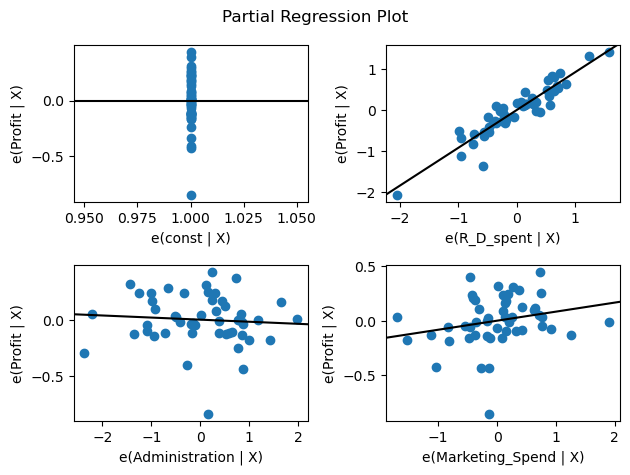

In [75]:
from statsmodels.graphics.regressionplots import plot_partregress_grid
import matplotlib.pyplot as plt

fig = plot_partregress_grid(model)
fig.tight_layout()
plt.show()


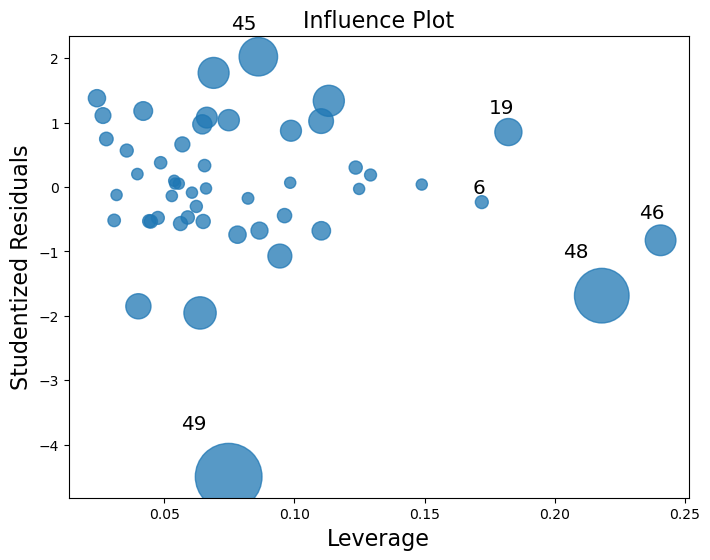

In [76]:
from statsmodels.graphics.regressionplots import influence_plot

fig, ax = plt.subplots(figsize=(8, 6))
influence_plot(model, ax=ax, criterion="cooks")
plt.show()


In [78]:
influence = model.get_influence()

summary_influence = influence.summary_frame()
summary_influence.head()

influential_points = summary_influence[
    summary_influence["cooks_d"] > (4 / len(df))
]

influential_points


,dfb_const,dfb_R_D_spent,dfb_Administration,dfb_Marketing_Spend,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
45,0.299143,-0.169881,0.078009,-0.210242,0.090323,1.957423,0.086170,0.601077,2.022073,0.620930
48,-0.269654,-0.141175,0.693163,0.429309,0.190527,-1.653329,0.218019,-0.872989,-1.686124,-0.890306
49,-0.661048,0.599022,-0.107675,0.144351,0.288082,-3.776120,0.074771,-1.073466,-4.496166,-1.278159


In [80]:
df_clean = df.drop(influential_points.index)
X = df_clean[["R_D_spent", "Administration", "Marketing_Spend"]]
y = df_clean["Profit"]   #  target

X = sm.add_constant(X)   # REQUIRED
model = sm.OLS(y, X).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     384.8
Date:                Sun, 04 Jan 2026   Prob (F-statistic):           4.53e-31
Time:                        13:10:21   Log-Likelihood:                 16.269
No. Observations:                  47   AIC:                            -24.54
Df Residuals:                      43   BIC:                            -17.14
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0207      0.026     

In [81]:
from sklearn.model_selection import train_test_split

X = df[["R_D_spent", "Administration", "Marketing_Spend"]] 
y = df["Profit"]                                           # target


In [82]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,      # 80% train, 20% test
    random_state=42    
)


In [83]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [84]:
y_train_pred = model.predict(X_train)
y_test_pred  = model.predict(X_test)


In [85]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Training metrics
r2_train = r2_score(y_train, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))

# Testing metrics
r2_test = r2_score(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f"Train R²  : {r2_train:.3f}")
print(f"Train RMSE: {rmse_train:.3f}")

print(f"Test R²   : {r2_test:.3f}")
print(f"Test RMSE : {rmse_test:.3f}")


Train R²  : 0.954
Train RMSE: 0.224
Test R²   : 0.900
Test RMSE : 0.225


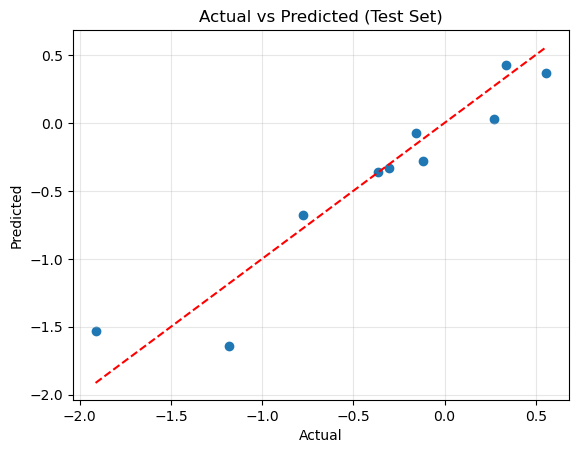

In [86]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_test_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted (Test Set)")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         "r--")
plt.grid(alpha=0.3)
plt.show()


In [87]:
import pandas as pd

coef_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
}).sort_values(by="Coefficient", key=abs, ascending=False)

coef_df


,Feature,Coefficient
0,R_D_spent,0.915375
2,Marketing_Spend,0.094788
1,Administration,-0.047219


so profit=0.915375*R_D_spent+0.094788*Marketing_Spend-0.047219*Administration


In [91]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

poly_model = Pipeline([
    ("poly", PolynomialFeatures(degree=2, include_bias=False)),
    ("lr", LinearRegression())
])

poly_model.fit(X_train, y_train)

y_test_pred_poly = poly_model.predict(X_test)

r2_poly = r2_score(y_test, y_test_pred_poly)
rmse_poly = np.sqrt(mean_squared_error(y_test, y_test_pred_poly))

r2_poly, rmse_poly


(0.8884838649343019, np.float64(0.23816115830598292))

So r2 is not increasing using polynominal, we ignore this model

In [92]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

ridge_coef = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": ridge.coef_
})
ridge_coef


,Feature,Coefficient
0,R_D_spent,0.869796
1,Administration,-0.035267
2,Marketing_Spend,0.130139


In [93]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)

lasso_coef = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": lasso.coef_
})
lasso_coef


,Feature,Coefficient
0,R_D_spent,0.906131
1,Administration,-0.035459
2,Marketing_Spend,0.092305


L1, L2 regularisation does not improve the model performance.